In [16]:
import nbimporter # to import methods from another notebook
import manta_file_processing as mfp
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [17]:
from importlib import reload
reload(mfp)

Importing Jupyter notebook from manta_file_processing.ipynb


<module 'manta_file_processing' from 'manta_file_processing.ipynb'>

In [3]:
dataset=mfp.get_manta_files()

total:1801
labelled:295


In [4]:
df=dataset[dataset.body_landmark_path.isnull()==False].sample(frac=1)
manta_data=np.array(df[["image_path","body_landmark_path"]])
#data=np.array([df.image_path,df.body_landmark_path])
manta_data.shape

(295, 2)

In [14]:
image_size=[300,300]
heatmap_size=[30,30]

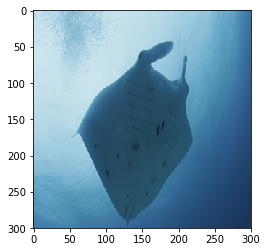

In [15]:
im_path,blm_path = manta_data[3]
image = Image.open(im_path)
body_landmarks=mfp.extract_body_landmarks(blm_path)
image=mfp.image_to_numpy(image,image_size)

plt.imshow(image)

In [29]:
X=[]
y=[]
i=0
print ("total:" + str(manta_data.shape[0]))

for im_path,blm_path in manta_data:#[:20]:
    try:
        image = Image.open(im_path)
        body_landmarks=mfp.extract_body_landmarks(blm_path)
    except:
        print(" \n Error on "+blm_path)
        
    image=mfp.image_to_numpy(image,image_size)
    heatmaps=mfp.gen_heatmaps(body_landmarks,heatmap_size=heatmap_size)
    numpy_heatmaps=mfp.heatmaps_to_numpy(heatmaps)
    
    if image.shape[2]>3:
        print("\n More then 3 channels")
        print(blm_path)
        numpy_heatmaps=None
    
    if numpy_heatmaps is not None:
        y.append(numpy_heatmaps)
        X.append(image) 
    print(i,end=" ")
    i+=1

X=np.array(X)
y=np.array(y)
print("\n====================")
print("Done.\nX.shape="+str(X.shape))
print("y.shape="+str(y.shape))


total:295
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
 More then 3 layers
C:\YandexDisk\_QUT\Project_1\MAntas_imag\0_manta_selected_annotated_some\0002 Theola\2-F-20160709-LEI-GavinHodson-THEOLA.json
79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 
 More then 3 layers
C:\YandexDisk\_QUT\Project_1\MAntas_imag\0_manta_selected_annotated_some\0042 Ellama\42-F-20150906-LEI-ChrisGarraway-ELLAMA.json
177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 
 More then

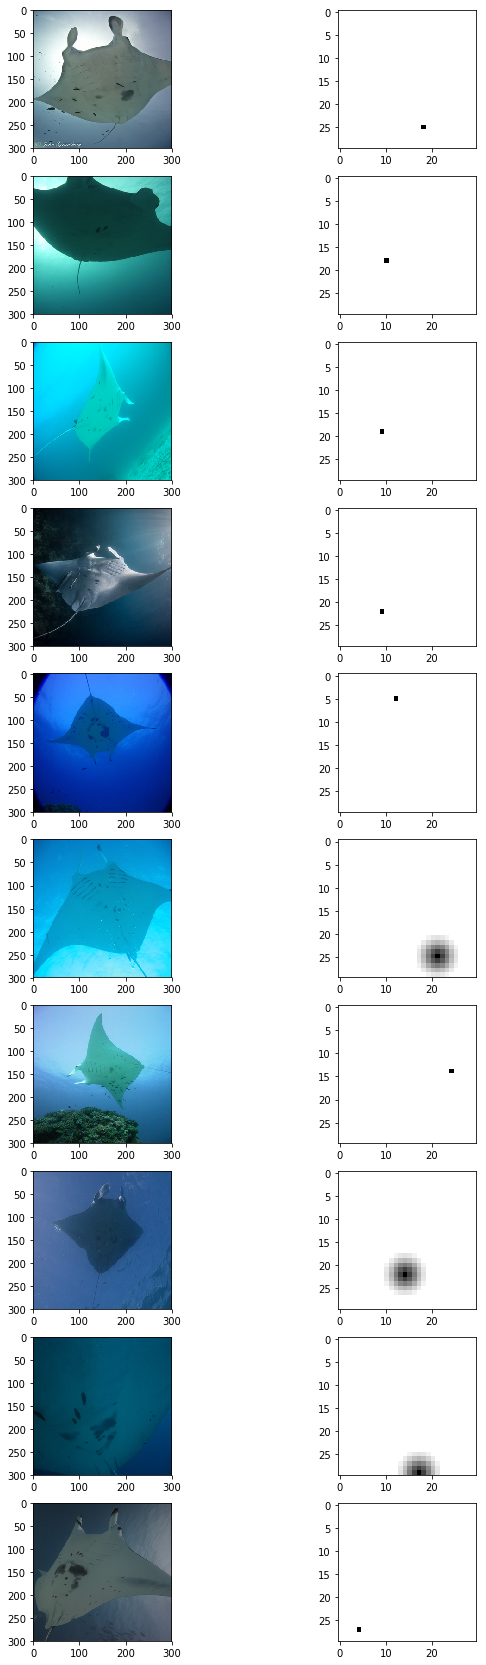

In [57]:
import random
n=10
samples=random.sample(list(np.arange(X.shape[0])),n)
fig, axes = plt.subplots(nrows=n, ncols=2,figsize=(10, 30))
for i,s in zip(range(len(samples)),samples):
    axes[i,0].imshow(X[s])
    axes[i,1].imshow(y[s],cmap='Greys')
plt.show()


In [9]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2DTranspose


In [10]:
import copy
input_shape=copy.copy(image_size)
input_shape.append(3)
batch_size=8
nb_train_samples=int(round(X.shape[0]*0.9,0))
X_train=X[:nb_train_samples]
X_test =X[nb_train_samples:]
y_train=y[:nb_train_samples]
y_test =y[nb_train_samples:]


In [11]:
#pip install h5py
#pip install cython
#restart jupyther
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=input_shape)
vgg16_net.trainable = False

In [64]:
model=Sequential()
model.add(vgg16_net)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from ker